In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [2]:
df = pd.read_csv('Salary Data.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [6]:
df['job_level'] = df['Job Title'].apply(lambda x : str(x).split(' ')[0])
df['job title'] = df['Job Title'].apply(lambda x : str(x).split(' ')[1:])

In [7]:
df = df.dropna()

In [8]:
def get_jobtitle(x):
    if 'Senior' in str(x):
        return x.replace('Senior ', '')
    elif 'Junior' in str(x):
        return x.replace('Junior ', '')
    return x

In [9]:
df['title'] = df['Job Title'].apply(lambda x : get_jobtitle(x))

In [10]:
df['title']

0           Software Engineer
1                Data Analyst
2                     Manager
3             Sales Associate
4                    Director
                ...          
370         Marketing Analyst
371    Director of Operations
372           Project Manager
373    Operations Coordinator
374          Business Analyst
Name: title, Length: 373, dtype: object

In [11]:
df.loc[df['job_level'] == 'Senior', 'Senior'] = 1
df.loc[df['job_level'] != 'Senior', 'Senior'] = 0
df.loc[df['job_level'] == 'Junior', 'Junior'] = 1
df.loc[df['job_level'] != 'Junior', 'Junior'] = 0


In [12]:
df = df.drop(['job_level'], axis = 1)

In [13]:
from sklearn import preprocessing

In [14]:
encode = preprocessing.LabelEncoder()

In [15]:
df['Education'] = encode.fit_transform(df['Education Level'])
df['jobs'] = encode.fit_transform(df['title'])

In [16]:
df['Male'] = pd.get_dummies(df['Gender'], drop_first=True)

In [17]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,job title,title,Senior,Junior,Education,jobs,Male
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,[Engineer],Software Engineer,0.0,0.0,0,101,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,[Analyst],Data Analyst,0.0,0.0,1,23,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,[Manager],Manager,1.0,0.0,2,63,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,[Associate],Sales Associate,0.0,0.0,0,90,0
4,52.0,Male,Master's,Director,20.0,200000.0,[],Director,0.0,0.0,1,31,1


In [18]:
import xgboost as xgb

In [19]:
X = df[['Age','Years of Experience', 'Senior','Junior', 'Education','Male', 'jobs']].to_numpy()
y = df['Salary']

In [20]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [21]:
pickle.dump(xgbr, open('model.pkl','wb'))

In [22]:
model = pickle.load(open('model.pkl','rb'))
demo = [[32.0,5.1,0,0.0,0,1,1]]
prd = model.predict(demo)

In [23]:
round(prd[0], 1)

74943.4

In [24]:
import random

In [28]:
def createlists():
    randomlist = []
    year = random.randint(18,80)
    randomlist.append(year)
    exp = random.randint(0,50)
    randomlist.append(exp)
    for i in range(0,4):
        n = random.randint(0,1)
        randomlist.append(n)
    job = random.randint(0,113)
    randomlist.append(job)
    return randomlist

In [30]:
demos = []
for i in range(100):
    demos.append(createlists())
    
demos = np.array(demos)

In [32]:
ypred = model.predict(demos)

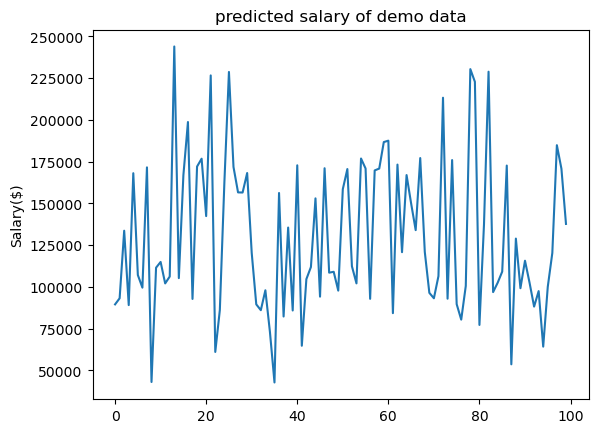

In [35]:
x_ax = range(len(demos))
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted salary of demo data")
plt.ylabel('Salary($)')
plt.show()
